In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
from sklearn.preprocessing import StandardScaler
sns.set(style="whitegrid")
np.random.seed(42)



In [2]:
# Load dataset
data = pd.read_csv("C:/Users/Lenovo/Downloads/dataset_soc.csv") 

In [3]:
data.describe()

,Start(Lat),Start(Long),Destination(Lat),Destination(Long),Speed(km/h),Distance(km),Altimetry1,Altimetry2,Altimetry3,Altimetry4,Altimetry5,Altimetry6,Altimetry7,Altimetry8,Altimetry9,Altimetry10,Time(min),Temperature,SOC(Consumed)
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,12.373991,79.681539,22.493957,89.574023,59.290000,330.426000,164.716643,145.402020,82.598162,102.986297,106.934069,124.045336,151.086064,247.911370,409.091895,165.990559,388.660000,38.49130,61.626000
std,0.874856,0.978916,36.930423,37.793216,10.922692,232.090641,486.824852,377.057563,124.987286,120.166846,116.564684,128.229433,146.670134,288.250526,606.947621,176.392316,227.862339,6.83261,20.578863
min,10.767200,76.733700,8.088300,66.955800,30.000000,76.700000,3.338000,-0.792200,-15.184000,-19.929900,0.000000,3.193000,2.793700,2.911600,3.239200,3.913450,120.000000,25.00000,20.000000
25%,11.940100,79.694700,10.362400,77.473500,54.500000,137.000000,4.361500,6.966400,8.965900,3.621500,20.319875,11.688100,22.525792,18.067127,7.082200,9.652125,159.000000,33.50000,46.625000
50%,12.983000,80.259400,11.016800,78.119800,64.000000,255.000000,4.361500,14.740800,39.006800,56.599300,63.815000,78.362400,151.744200,95.950000,157.060000,53.383280,412.000000,39.50000,67.000000
75%,13.082700,80.270700,13.082700,79.843700,68.000000,562.500000,46.155500,69.835600,86.712760,168.081800,134.866600,153.075600,197.021200,377.953175,505.947850,278.327657,660.000000,44.00000,79.000000
max,13.082700,80.270700,147.535800,230.646700,76.000000,766.000000,1812.000000,1419.117300,483.224000,411.476600,343.677100,390.803200,477.447000,907.662960,2273.498200,534.503400,879.000000,49.00000,93.000000


In [4]:
# Define features and target
features = ['Start(Lat)', 'Start(Long)', 'Destination(Lat)', 'Destination(Long)', 
            'Speed(km/h)', 'Distance(km)', 'Altimetry1', 'Altimetry2', 'Altimetry3', 
            'Altimetry4', 'Altimetry5', 'Altimetry6', 'Altimetry7', 'Altimetry8', 
            'Altimetry9', 'Altimetry10', 'Time(min)','Temperature']
target = 'SOC(Consumed)'


In [5]:
# Define X and y
X = data[features]
y = data[target]

In [6]:
# Handle missing values by filling with the mean
X = X.fillna(X.mean())


In [7]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [9]:
# Instantiate the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [10]:
# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [11]:
# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
test_predictions = model.predict(X_test)
test_mse = mean_squared_error(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)

In [12]:
print(f"Train MSE: {mse:.2f},Train R² Score: {r2:.2f}")
print(f"Test MSE: {test_mse:.4f}, Test R² Score: {test_r2:.4f}")
# If Train MSE = Test MSE,then model is good
# If Train R² Score and Test R² Score are close to 1, the model is good

Train MSE: 32.81,Train R² Score: 0.92
Test MSE: 32.8066, Test R² Score: 0.9201


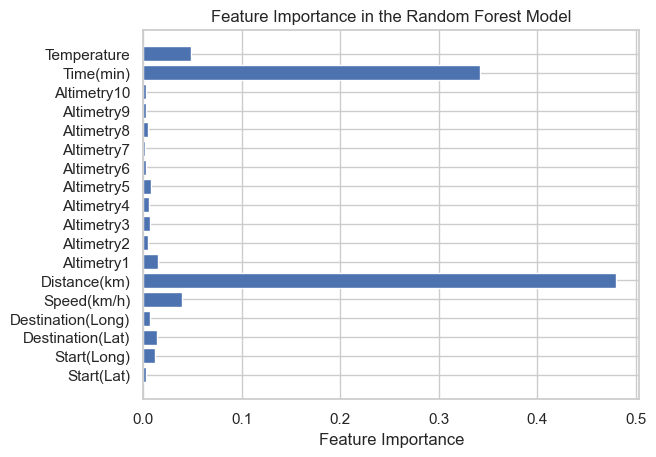

In [13]:
# Check Feature Importances to see which features are being used by the model
import matplotlib.pyplot as plt
importances = model.feature_importances_
plt.barh(features, importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in the Random Forest Model')
plt.show()

In [14]:
# Example input for prediction (changed values for testing)
new_data = [[12.34, 56.78, 34.56, 780.90, 100, 100, 10, 20, 30, 10, 20, 30, 10, 20, 30, 40, 500, 25]]
new_data_df = pd.DataFrame(new_data, columns=features)
scaled_data = scaler.transform(new_data_df)
predicted_soc = model.predict(scaled_data)
soc_left=100-predicted_soc
soc_left = soc_left.item()                                                            #INPUT VALUES 
# according to Mahindra XUV 400 Statastics
# Range (Distance)= Battery Capacity×SoC/Energy Consumption Rate , (Battery capacity=40kwh,Energy Consumption Rate= 0.87kwh/km, for 100% SOC with 40kwh vehicle can go 456 km)
range=soc_left*456/100
print("Consumed SoC %:", predicted_soc)
print("SoC Left %:", soc_left)
print("Range(km)[VEHICLE CAN TRAVEL]:", range)

Consumed SoC %: [55.4515]
SoC Left %: 44.54849999999998
Range(km)[VEHICLE CAN TRAVEL]: 203.1411599999999


In [15]:
# Test with random values to check prediction consistency
random_input = np.random.rand(1, len(features)) * 100                                                                                
new_data_df1 = pd.DataFrame(random_input, columns=features)
scaled_random_input = scaler.transform(new_data_df1)
random_prediction = model.predict(scaled_random_input)                    #RANDOM INPUT VALUES GENERATION 
random_soc_left=100-random_prediction
random_soc_left = random_soc_left.item() 
Range=random_soc_left*456/100
print("Random Input Data:",random_input)


Random Input Data: [[37.45401188 95.07143064 73.19939418 59.86584842 15.60186404 15.59945203
   5.80836122 86.61761458 60.11150117 70.80725778  2.05844943 96.99098522
  83.24426408 21.23391107 18.18249672 18.34045099 30.4242243  52.47564316]]


In [16]:
print("Consumed SoC %:", random_prediction)
print("SoC Left %:", random_soc_left)
print("Range(km)[VEHICLE CAN TRAVEL]:", Range)

Consumed SoC %: [30.42616667]
SoC Left %: 69.57383333333334
Range(km)[VEHICLE CAN TRAVEL]: 317.25668


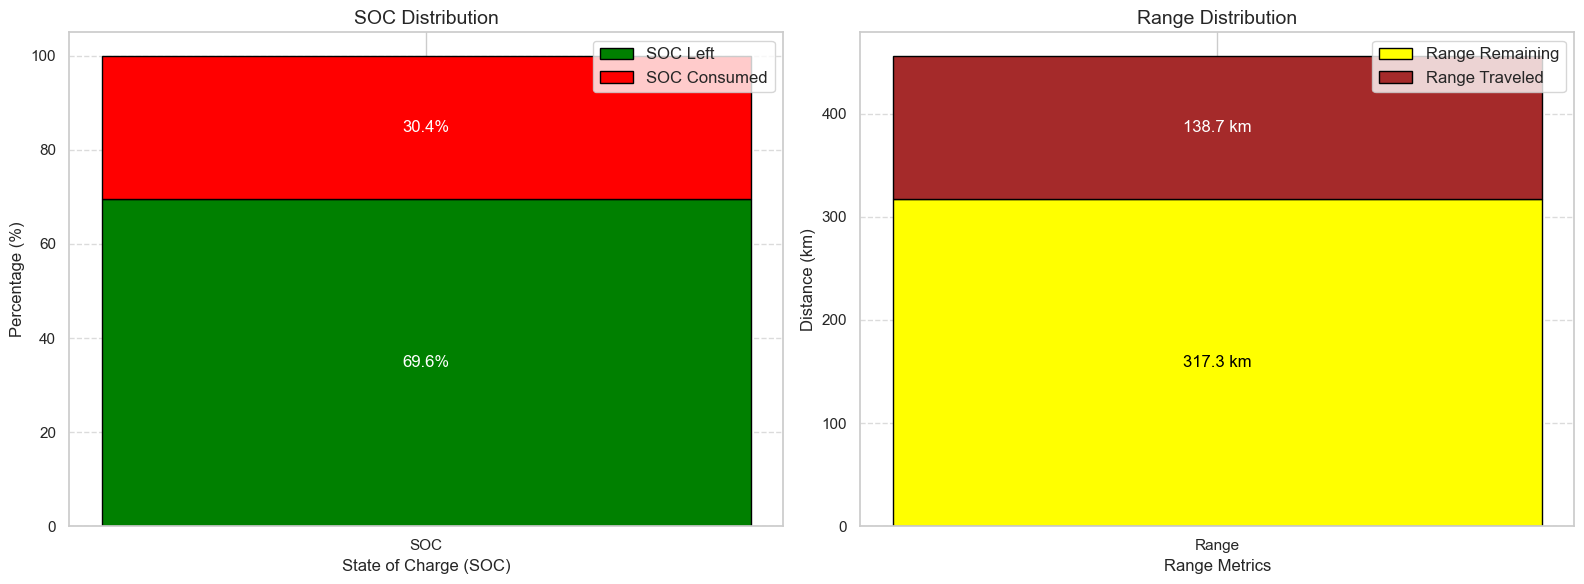

In [17]:

# Calculate SOC Consumed and Range Traveled
soc_consumed = 100 - random_soc_left
range_traveled = 456 - Range  # Assuming 456 km is the total possible range

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False)                               #RESULTS 

# First Chart: SOC Left and SOC Consumed
axes[0].bar(['SOC'], [random_soc_left], color='green', edgecolor='black', label='SOC Left', width=0.4)
axes[0].bar(['SOC'], [soc_consumed], bottom=[random_soc_left], color='red', edgecolor='black', label='SOC Consumed', width=0.4)

# Annotate values for SOC chart
axes[0].text(0, random_soc_left / 2, f"{random_soc_left:.1f}%", ha='center', va='center', fontsize=12, color='white')  # SOC Left
axes[0].text(0, random_soc_left + soc_consumed / 2, f"{soc_consumed:.1f}%", ha='center', va='center', fontsize=12, color='white')  # SOC Consumed

# Add labels and title for SOC chart
axes[0].set_title('SOC Distribution', fontsize=14)
axes[0].set_xlabel('State of Charge (SOC)', fontsize=12)
axes[0].set_ylabel('Percentage (%)', fontsize=12)
axes[0].legend(fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Second Chart: Range Traveled and Remaining Range
axes[1].bar(['Range'], [Range], color='yellow', edgecolor='black', label='Range Remaining', width=0.4)
axes[1].bar(['Range'], [range_traveled], bottom=[Range], color='brown', edgecolor='black', label='Range Traveled', width=0.4)

# Annotate values for Range chart
axes[1].text(0, Range / 2, f"{Range:.1f} km", ha='center', va='center', fontsize=12, color='black')  # Remaining Range
axes[1].text(0, Range + range_traveled / 2, f"{range_traveled:.1f} km", ha='center', va='center', fontsize=12, color='white')  # Traveled Range

# Add labels and title for Range chart
axes[1].set_title('Range Distribution', fontsize=14)
axes[1].set_xlabel('Range Metrics', fontsize=12)
axes[1].set_ylabel('Distance (km)', fontsize=12)
axes[1].legend(fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [18]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),            #COMPARISION OF MODEL PERFORMETRICS 
    'Support Vector Regression': SVR(kernel='rbf'),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'k-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5)
}


In [19]:
# Evaluate models
results = []
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)    
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)
    
    # Store the results
    results.append({'Model': name, 'MSE': mse, 'MAE': mae, 'R2 Score': r2, 'Explained Variance': evs, 'RMSE' : rmse})

# Convert results to DataFrame for comparison
results_df = pd.DataFrame(results)

In [20]:
# Display results
print(results_df)

                       Model        MSE       MAE  R2 Score  \
0          Linear Regression  71.484243  5.413587  0.825939   
1              Random Forest  32.806550  2.572198  0.920118   
2  Support Vector Regression  95.145910  5.974131  0.768324   
3              Decision Tree  54.936555  2.823458  0.866232   
4        k-Nearest Neighbors  59.384012  4.694000  0.855403   

   Explained Variance      RMSE  
0            0.829087  8.454835  
1            0.922360  5.727700  
2            0.775718  9.754277  
3            0.869816  7.411920  
4            0.855933  7.706102  


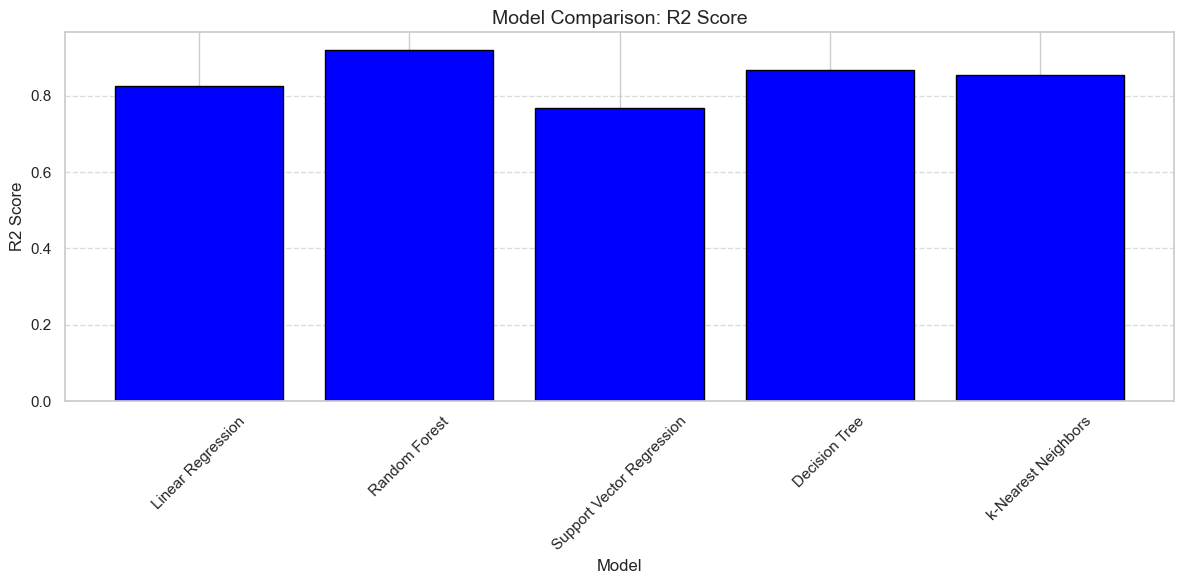

In [21]:

# Plot comparison of R2 Scores
plt.figure(figsize=(12, 6))
plt.bar(results_df['Model'], results_df['R2 Score'], color='blue', edgecolor='black')
plt.xlabel('Model', fontsize=12)
plt.ylabel('R2 Score', fontsize=12)
plt.title('Model Comparison: R2 Score', fontsize=14)                                               # COMPARITIVE MODEL PERFORMANCE RESULTS 
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


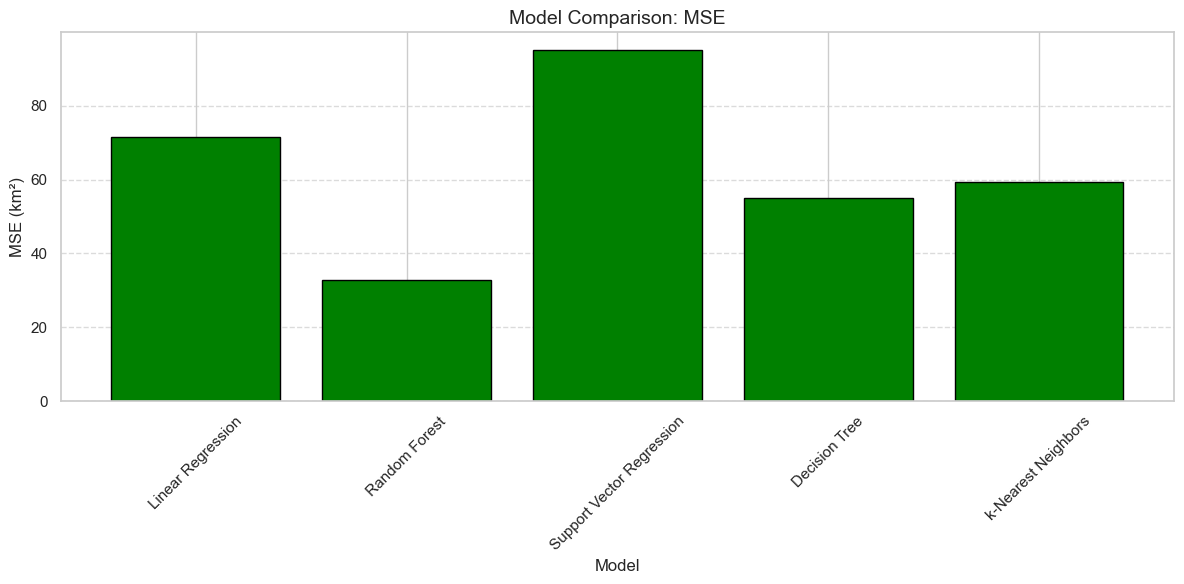

In [22]:
plt.figure(figsize=(12, 6))
plt.bar(results_df['Model'], results_df['MSE'], color='green', edgecolor='black')
plt.xlabel('Model', fontsize=12)
plt.ylabel('MSE (km²)', fontsize=12)
plt.title('Model Comparison: MSE', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


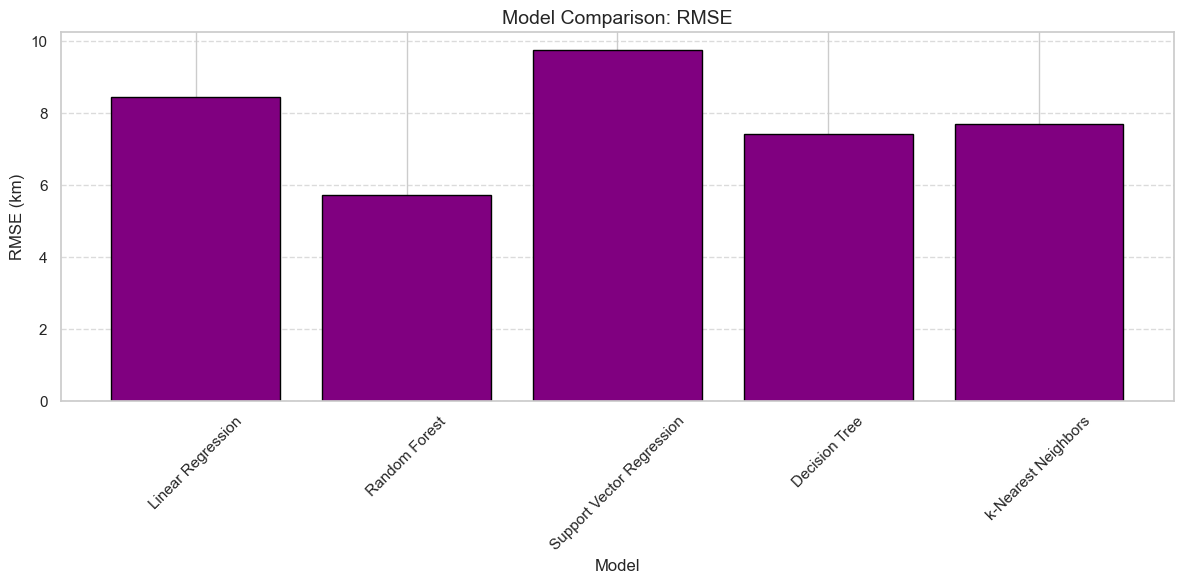

In [23]:
plt.figure(figsize=(12, 6))
plt.bar(results_df['Model'], results_df['RMSE'], color='purple', edgecolor='black')
plt.xlabel('Model', fontsize=12)
plt.ylabel('RMSE (km)', fontsize=12)
plt.title('Model Comparison: RMSE', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


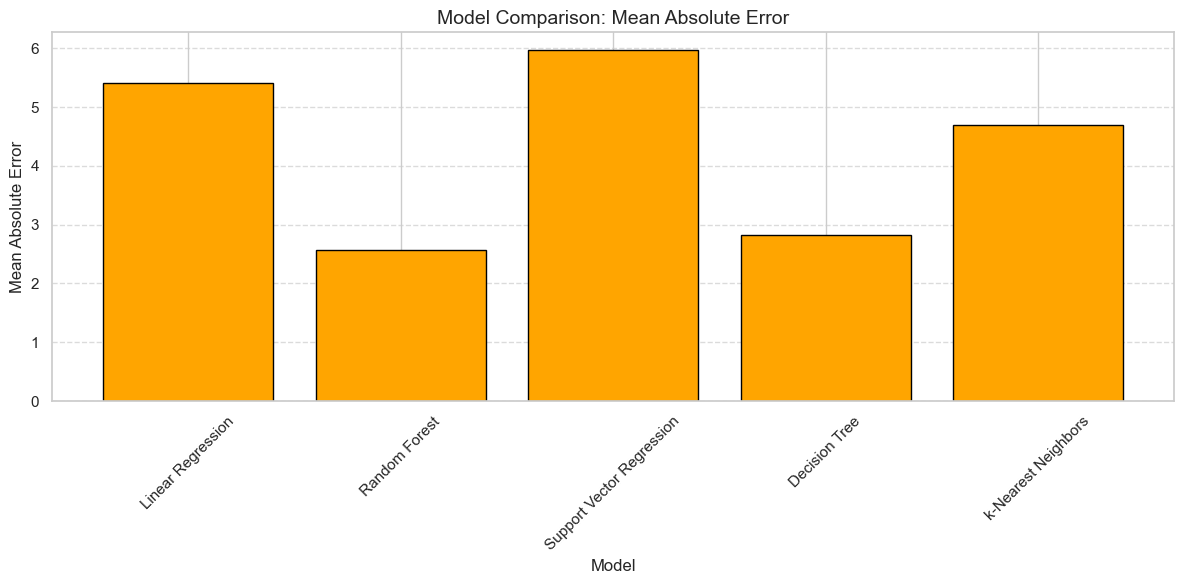

In [24]:
# Plot comparison of Mean Absolute Error (MAE)
plt.figure(figsize=(12, 6))
plt.bar(results_df['Model'], results_df['MAE'], color='orange', edgecolor='black')
plt.xlabel('Model', fontsize=12)
plt.ylabel('Mean Absolute Error', fontsize=12)
plt.title('Model Comparison: Mean Absolute Error', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


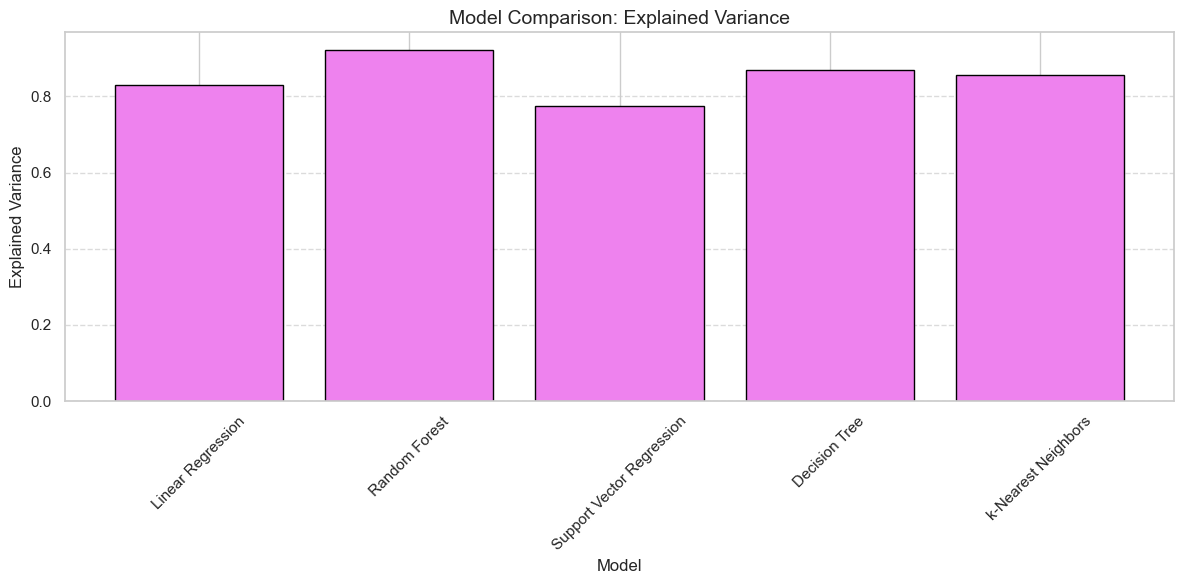

In [25]:
# Plot comparison of Explained Variance
plt.figure(figsize=(12, 6))
plt.bar(results_df['Model'], results_df['Explained Variance'], color='violet', edgecolor='black')
plt.xlabel('Model', fontsize=12)
plt.ylabel('Explained Variance', fontsize=12)
plt.title('Model Comparison: Explained Variance', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()